# Regression 
This is a dataset containing over 21613 houses and their characteristics. The goal is to find the best model to predict a house’s price. 

 

1. Explore this dataset using what you have learned in data preprocessing and data visualization 

2. Write a paragraph selecting the most important features (feature selection). 

3. Split your dataset into a training set and a testing set. 

4. Apply linear regression to your training set. 

5. Plot the linear regression. 

5. Measure the performance of linear regression using the testing set. 

6. Apply multiple-linear regression and compare it to the linear model. 

7. Apply polynomial regression and compare it to linear and multilinear regression. 

Note: Every result has to be interpreted and justified. Write your interpretations in a markdown.

##### Explore this dataset using what you have learned in data preprocessing and data visualization

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("data/kc_house_data.csv")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [5]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

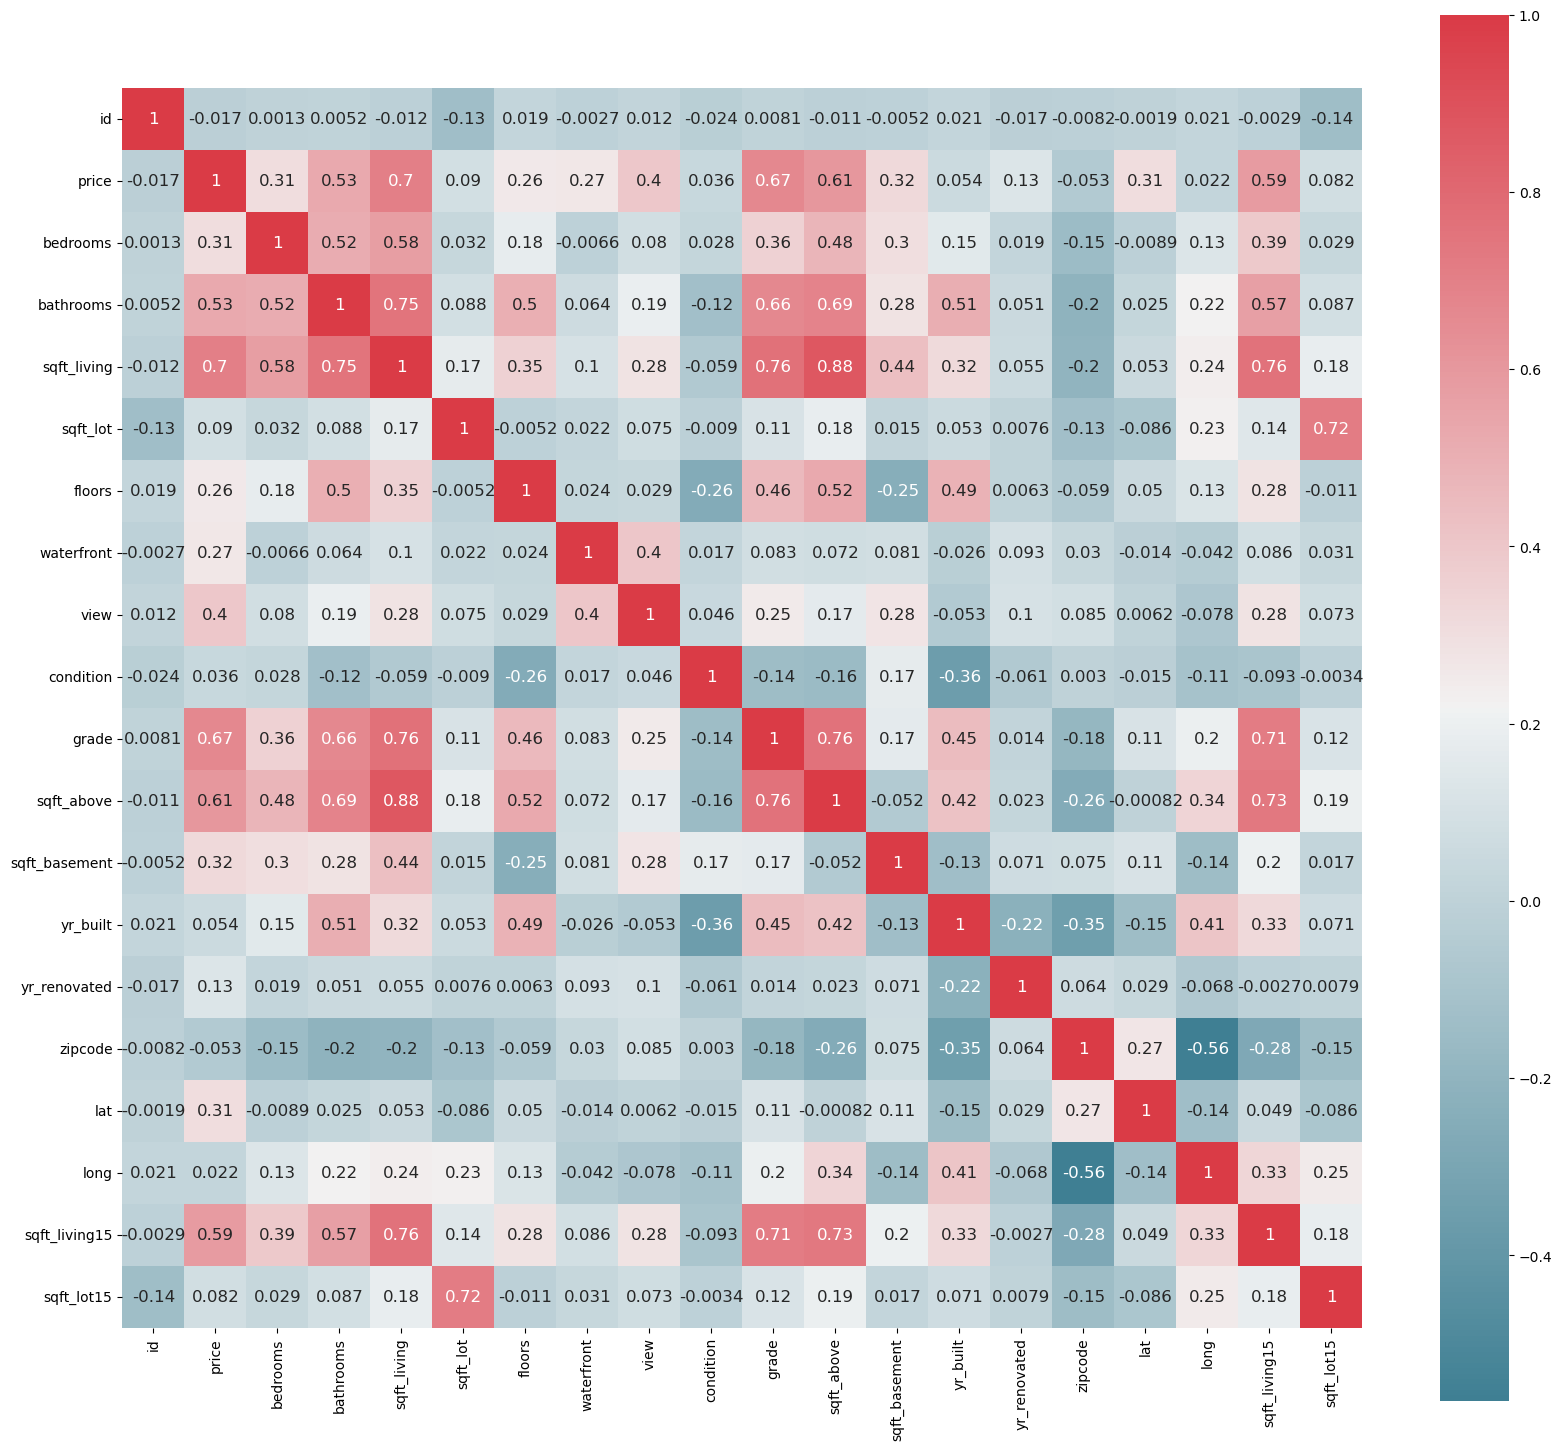

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 20 , 20 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })
    
plot_correlation_map(data) 

### Summary:
Prices is proportional to bedroom (0.31) bathroom(0.53), sqrt_living(0.7), view(0.4), garage(0.67), sqrt_above(0.61) , sqrt_batiment(0,32),lat (0,31) and sqrt_living15 (0.59)

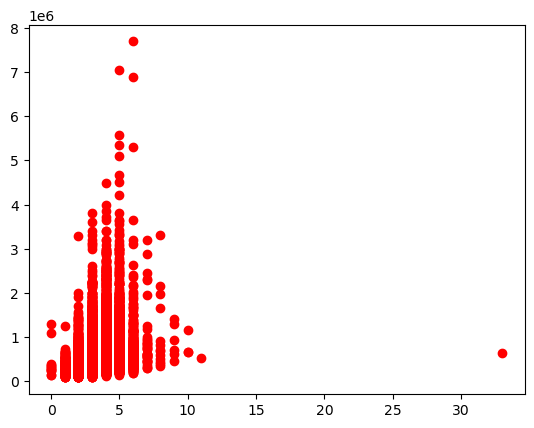

In [7]:
import matplotlib.pyplot as plt

plt.plot(data.bedrooms,data.price,"ro")
plt.show()

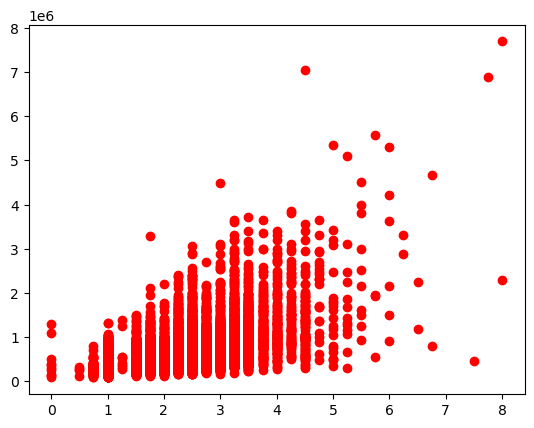

In [8]:
plt.plot(data.bathrooms,data.price,"ro")
plt.show()

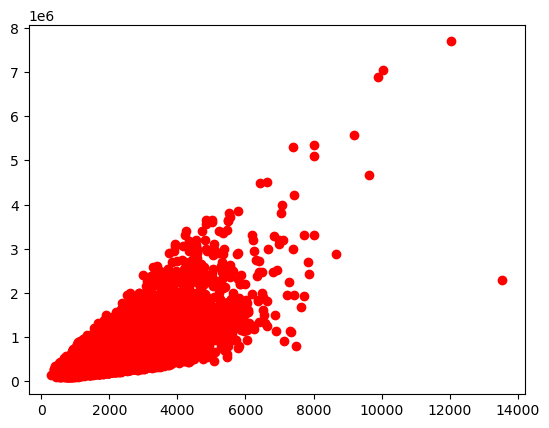

In [9]:
plt.plot(data.sqft_living,data.price,"ro")
plt.show()

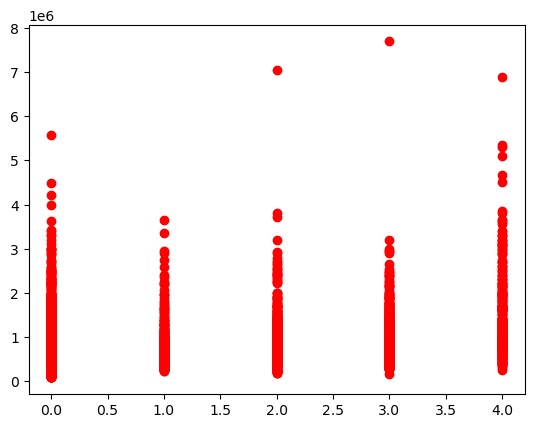

In [10]:
plt.plot(data.view,data.price,"ro")
plt.show()

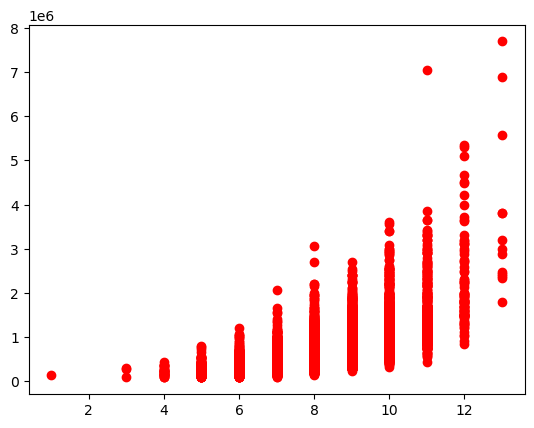

In [11]:
plt.plot(data.grade,data.price,"ro")
plt.show()

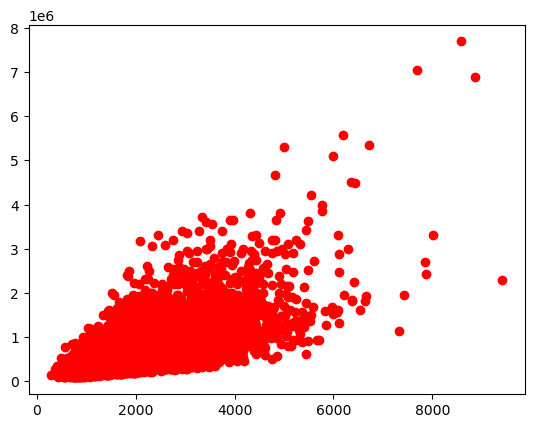

In [12]:
plt.plot(data.sqft_above,data.price,"ro")
plt.show()

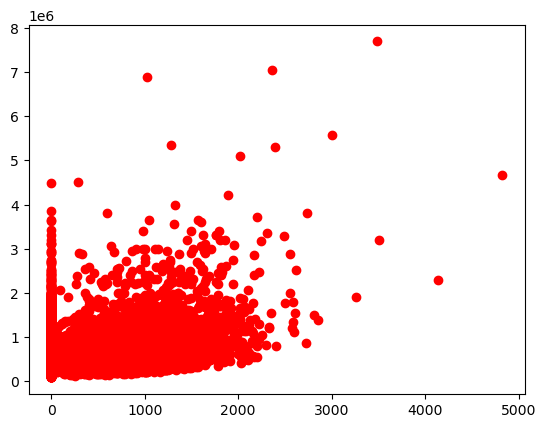

In [13]:
plt.plot(data.sqft_basement,data.price,"ro")
plt.show()

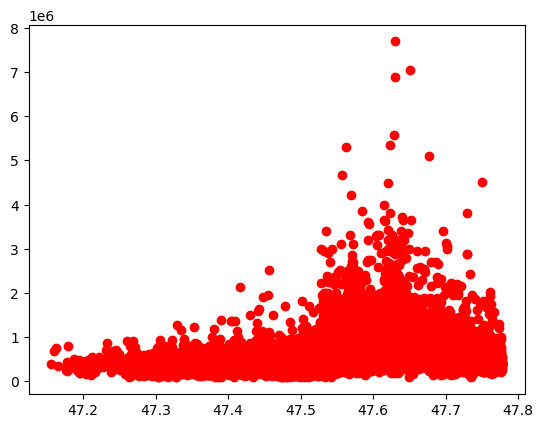

In [14]:
plt.plot(data.lat,data.price,"ro")
plt.show()

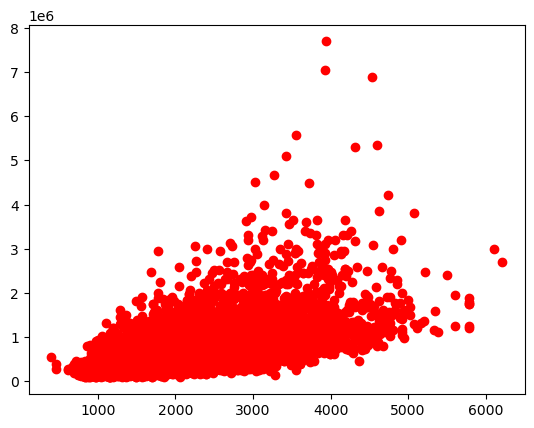

In [15]:
plt.plot(data.sqft_living15,data.price,"ro")
plt.show()

In [16]:
data = data.drop(["id","date" ,"sqft_lot", "floors", "waterfront", "yr_built", "yr_renovated", "zipcode", "long","sqft_lot15","condition"], axis = 1)
data.head()

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,0,8,1680,0,47.6168,1800


#### Split your dataset into a training set and a testing set.
#### Apply linear regression to your training set.
#### Plot the linear regression.
#### Measure the performance of linear regression using the testing set.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [18]:
#extract x and y from our data
x=data["sqft_living"].values[:,np.newaxis]
y=data["price"].values

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62902408306.865036
R squared 0.4996528488387416


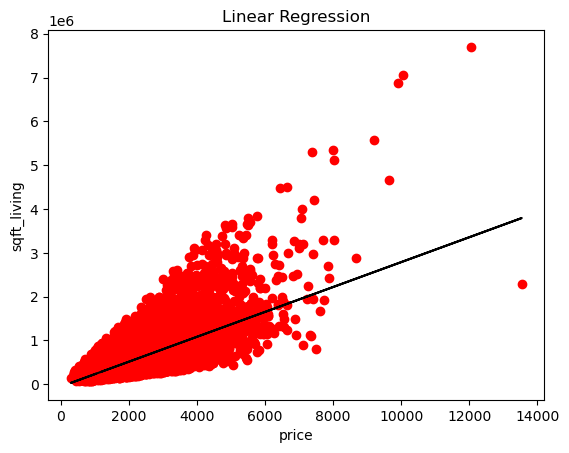

In [20]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("sqft_living")
plt.xlabel("price")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [21]:
x=data["grade"].values[:,np.newaxis]
#y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 68216329489.98442
R squared 0.45738411228260767


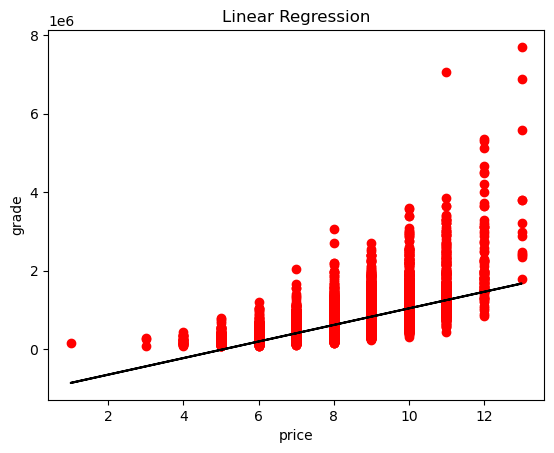

In [22]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("grade")
plt.xlabel("price")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [23]:
x=data["sqft_above"].values[:,np.newaxis]
#y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 79241092180.4961
R squared 0.3696893999034566


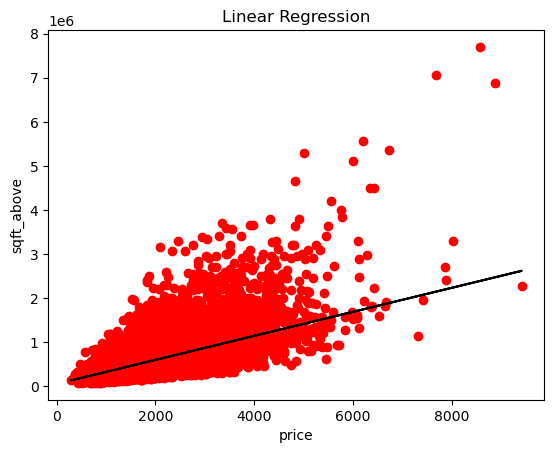

In [24]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("sqft_above")
plt.xlabel("price")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [25]:
x=data["sqft_living15"].values[:,np.newaxis]
#y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


MSE 80478264938.9221
R squared 0.35984850697368287


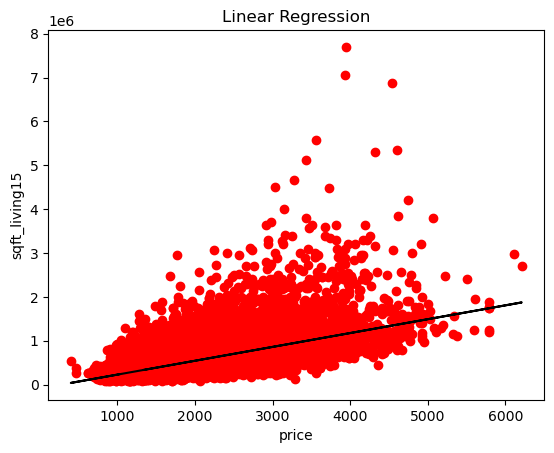

In [26]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("sqft_living15")
plt.xlabel("price")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [27]:
x=data["bathrooms"].values[:,np.newaxis]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 89550909069.11131
R squared 0.2876816096127013


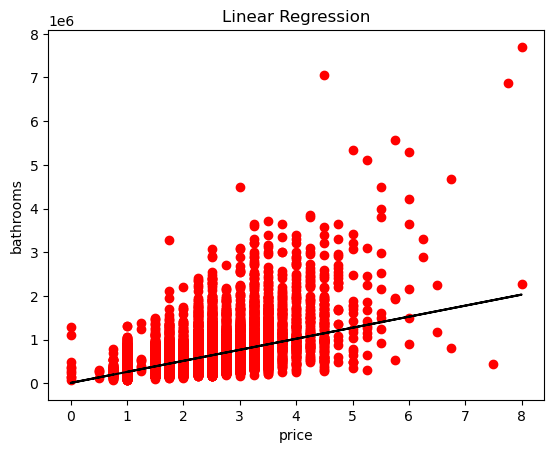

In [28]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("bathrooms")
plt.xlabel("price")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [29]:
x=data["view"].values[:,np.newaxis]
#y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 106764161864.068
R squared 0.15076154200322023


In [30]:
x=data["sqft_basement"].values[:,np.newaxis]
#y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 112566850489.23206
R squared 0.1046049829647675


In [31]:
x=data["lat"].values[:,np.newaxis]
#y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 113502118121.8914
R squared 0.09716554609469508


In [32]:
x=data["bedrooms"].values[:,np.newaxis]
#y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 113635389576.1048
R squared 0.09610545961721906


### Apply multiple-linear regression and compare it to the linear model.


In [33]:
x = data[["sqft_living","grade"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

In [34]:
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 57413775762.864296
R squared 0.5433112989852684


In [35]:
x = data[["sqft_living","grade","sqft_above"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 56491826520.691086
R squared 0.5506447968473256


In [36]:
x = data[["sqft_living","grade","sqft_above","sqft_living15"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 56391021662.11836
R squared 0.5514466329799586


In [37]:
x = data[["sqft_living","grade","sqft_above","sqft_living15","bathrooms"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 56262505729.60964
R squared 0.552468892420263


In [38]:
x = data[["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 52329809274.131065
R squared 0.5837508976859649


In [39]:
x = data[["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view","sqft_basement"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 52329809274.130936
R squared 0.5837508976859659


#### Beste R Squared =  0.6468

In [40]:
x = data[["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view","sqft_basement","lat"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 44424993980.09334
R squared 0.6466284872614352


In [41]:
x = data[["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view","sqft_basement","lat","bedrooms"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 44456243581.957054
R squared 0.6463799172990397


### Apply polynomial regression and compare it to linear and multilinear regression. 

In [42]:
#Importing libraries
#import numpy as np
#import pandas as pd 
#import matplotlib.pyplot as plt

#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

#from sklearn.metrics import mean_squared_error
#from sklearn import metrics

In [43]:
x = data["sqft_living"].values.reshape(-1,1)
y=data["price"].values

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=40) #splitting data with test size of 35%
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_fit = poly.fit_transform(x_test)
predicted = lg.predict(x_test_fit)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  57833412820.906296
R squared:  0.5476781189260149


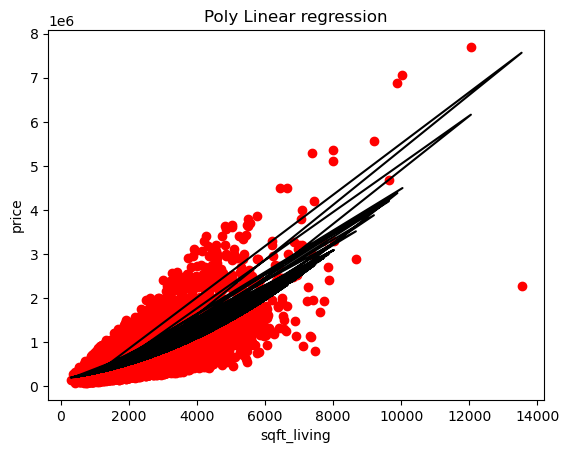

In [45]:
plt.scatter(x, y, color="r")
plt.title("Poly Linear regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

In [46]:
x = data["grade"].values.reshape(-1,1)
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=40) #splitting data with test size of 35%
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_fit = poly.fit_transform(x_test)
predicted = lg.predict(x_test_fit)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  61554878481.24982
R squared:  0.5185721010423474


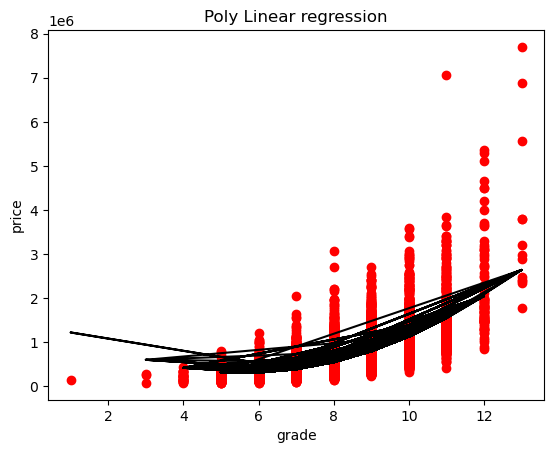

In [47]:
plt.scatter(x, y, color="r")
plt.title("Poly Linear regression")
plt.ylabel("price")
plt.xlabel("grade")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

In [48]:
x = data["sqft_above"].values.reshape(-1,1)
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=40) #splitting data with test size of 35%
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_fit = poly.fit_transform(x_test)
predicted = lg.predict(x_test_fit)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  77202779334.36633
R squared:  0.3961880395888223


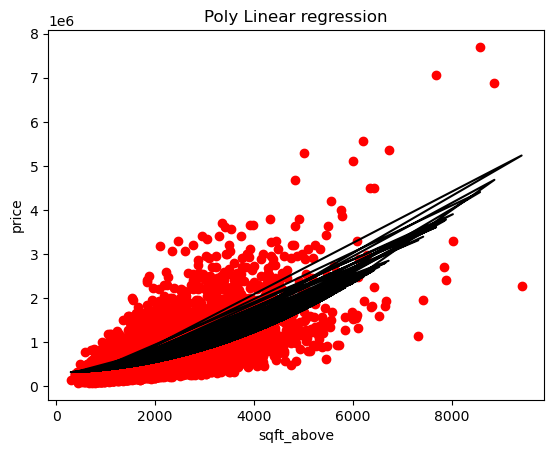

In [49]:
plt.scatter(x, y, color="r")
plt.title("Poly Linear regression")
plt.ylabel("price")
plt.xlabel("sqft_above")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

In [50]:
x = data[["sqft_living","grade"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=40) #splitting data with test size of 35%
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_fit = poly.fit_transform(x_test)
predicted = lg.predict(x_test_fit)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  50390267325.68091
R squared:  0.6058918297774463


In [51]:
x = data[["sqft_living","grade","sqft_above"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=40) #splitting data with test size of 35%
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_fit = poly.fit_transform(x_test)
predicted = lg.predict(x_test_fit)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  49041253679.55692
R squared:  0.6164426231725872


In [52]:
x = data[["sqft_living","grade","sqft_above"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=40) #splitting data with test size of 35%
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 3) 
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_fit = poly.fit_transform(x_test)
predicted = lg.predict(x_test_fit)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  51948647661.66208
R squared:  0.5937035550307604


In [53]:
x = data[["sqft_living","grade","sqft_above"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=40) #splitting data with test size of 35%
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 4) 
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_fit = poly.fit_transform(x_test)
predicted = lg.predict(x_test_fit)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  86504663854.15051
R squared:  0.32343691358228643


In [54]:
x = data[["sqft_living","grade","sqft_above","sqft_living15"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=40) #splitting data with test size of 35%
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_fit = poly.fit_transform(x_test)
predicted = lg.predict(x_test_fit)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  49092224665.94731
R squared:  0.6160439731306868


In [55]:
x = data[["sqft_living","grade","sqft_above","sqft_living15"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=40) #splitting data with test size of 35%
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 3) 
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_fit = poly.fit_transform(x_test)
predicted = lg.predict(x_test_fit)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  56824033634.50558
R squared:  0.5555725915161689


In [56]:
x = data[["sqft_living","grade","sqft_above","sqft_living15","bathrooms"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=40) #splitting data with test size of 35%
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_fit = poly.fit_transform(x_test)
predicted = lg.predict(x_test_fit)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  49248168686.79416
R squared:  0.6148243167173585


In [57]:
x = data[["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=40) #splitting data with test size of 35%
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_fit = poly.fit_transform(x_test)
predicted = lg.predict(x_test_fit)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  46062657184.94509
R squared:  0.639738574486672


In [58]:
x = data[["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view","sqft_basement"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=40) #splitting data with test size of 35%
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_fit = poly.fit_transform(x_test)
predicted = lg.predict(x_test_fit)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  46062657184.235
R squared:  0.6397385744922257


### Best R squared = 0.7131387133228593

In [59]:
x = data[["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view","sqft_basement","lat"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=40) #splitting data with test size of 35%
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_fit = poly.fit_transform(x_test)
predicted = lg.predict(x_test_fit)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  36686171352.149635
R squared:  0.7130731660814544


In [60]:
x = data[["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view","sqft_basement","lat"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=40) #splitting data with test size of 35%
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 3) 
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_fit = poly.fit_transform(x_test)
predicted = lg.predict(x_test_fit)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  43518148396.92414
R squared:  0.6596394751125965


In [61]:
x = data[["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view","sqft_basement","lat","bedrooms"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=40) #splitting data with test size of 35%
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_fit = poly.fit_transform(x_test)
predicted = lg.predict(x_test_fit)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  37010738439.721176
R squared:  0.7105346889550969


In [62]:
x = data[["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view","sqft_basement","lat","bedrooms"]]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=40) #splitting data with test size of 35%
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 3) 
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_fit = poly.fit_transform(x_test)
predicted = lg.predict(x_test_fit)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  203602846685.2874
R squared:  -0.5924016604362692


### Summary:
Applying polynomial Regession allows us to get a better result (0.7131 >  0.6468) , and thus a better model for our Prediction